In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Scatter Plot

In [2]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]  # öğrencilerin TV izleme süreleri
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]  # not ortalaması

*Scatter plot = iki numeric veri arasındaki görsel ilişkiyi gösterir.*

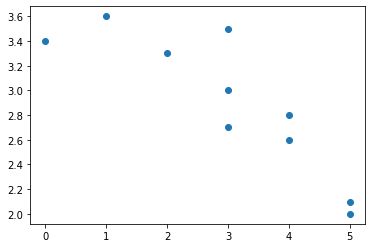

In [3]:
plt.scatter(tv_hours, GPA);  # x ekseninde TV izleme saati (integer), y ekseninde not ortalaması (float)

*Negatif bir ilişki var. Mesela bir öğrenci çok televizyon izleyince GPA not ortalaması düşüyor.*

- **Draw a fitting line**

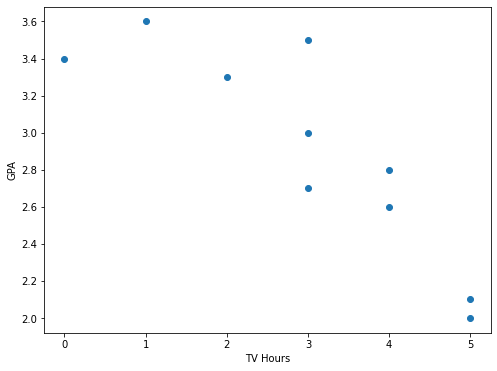

In [4]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.scatter(tv_hours, GPA)
ax.set_xlabel("TV Hours")
ax.set_ylabel("GPA")
ax.axis("tight")
plt.show()

*Korelasyon: İki quantitative (sayısal ise) arasındaki ilişkiyi inceler.*

## Scipy

- **Convert the list to Numpy array**

In [5]:
x = np.array(tv_hours)

In [6]:
y = np.array(GPA)

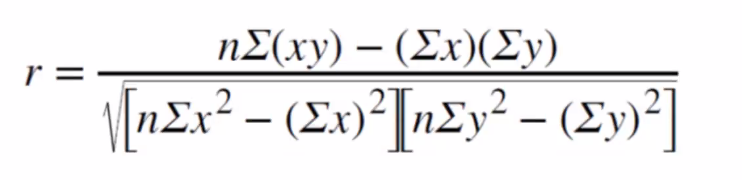

- **Use Pearson Correlation Formula**

In [7]:
len(x)*sum(x*y) - sum(x)*sum(y)  # Formülün pay kısmı

-71.00000000000011

In [8]:
np.sqrt((len(x)*sum(x**2)-sum(x)**2)*(len(y)*sum(y**2)-sum(y)**2))  # Formülün payda kısmı

82.84926070883178

In [9]:
-71.00000000000011 / 82.84926070883178

-0.8569780755138527

- **Scipy içinde pearson methodu ile korelasyon nasıl hesaplanır?**

In [10]:
r, p = stats.pearsonr(tv_hours, GPA)
r

-0.8569780755138501

In [11]:
r, p = stats.pearsonr(GPA, tv_hours)  # önce GPA sonra tv_hours u yazsak da aynı değeri elde ederiz. Çünkü korelasyon :D 
# Ama simple linear regression için sıralama önemlidir.
# p değeri anlamlılık derecesidir. P değeri anlamlı çıkarsa bulduğumuz istatistik, popülasyonda anlamlı bir istatistiktir.
r

-0.8569780755138501

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets.

Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [12]:
stats.spearmanr(GPA, tv_hours)  # Farklı bir korelasyon bulma metodudur.

SpearmanrResult(correlation=-0.8643457510060755, pvalue=0.001253729937570454)

Calculate Kendall's tau, a correlation measure for ordinal data.

Kendall's tau is a measure of the correspondence between two rankings.

In [13]:
stats.kendalltau(tv_hours, GPA)  # Bu da başka bir koralasyon bulma formülüdür.

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

## Numpy

- **Calculate covariance with Numpy**

In [14]:
np.cov(GPA, tv_hours)  # hem kovaryansı hem de sample varyansı verir.

array([[ 0.31777778, -0.78888889],
       [-0.78888889,  2.66666667]])

- **Calculate the sample variance**

In [15]:
stats.tvar(GPA)  # Ama bu sample variance. Sample variance ile popülasyon variance arasındaki fark (n-1) dir. Biz Popülasyon varyansını bulmaya çalışsaydık farklı çıkardı.

0.3177777777777777

In [16]:
np.var(GPA)  # Bu popülasyon varyansıdır.

0.2859999999999999

In [17]:
stats.tvar(tv_hours)  # bu da tv izleme sürelerinin sample varyansını verir.

2.6666666666666665

- **Calculate the correlation coefficients with Numpy**

In [18]:
np.corrcoef(tv_hours, GPA)  # Corrcoef de hesaplanan şey bize default olarak Pearson koralasyonu verir.

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

*Biz array yoluyla yani matris yoluyla corrcoef içinde matris ile hesaplama yapabiliriz. Ve bize corrcoef sonuç matrisi verir*

## Pandas

https://github.com/mwaskom/seaborn-data  # seaborn içindeki datasetlerin github adresi

In [19]:
# sns.get_dataset_names()  komutu ile de isimleri gelir.

*Şimdi bir veri seti üzerinde çalışalım.*

In [20]:
df = sns.load_dataset("car_crashes")

*Şimdi veri setini tanımaya yönelik bir takım incelemelerde bulunalım.*

In [21]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [22]:
df.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [23]:
df.describe()  # değişkenlerin kendisi ile alakalı bir takım istatistiki bilgilere bakarız.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


- **Create correlation matris with Pandas**

In [24]:
df.corr()  # değişkenler arasındaki karşılıklı incelemeler için korelasyonu inceleyelim. (Bu Pearson'dur.)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [25]:
df.corr().loc['total', 'no_previous']

0.9561791745723077

In [26]:
df.corr().iloc[0,4]

0.9561791745723077

In [27]:
df["total"].corr(df["no_previous"])

0.9561791745723079

In [28]:
df.corr().iloc[0:1, 4:5]

,no_previous
total,0.956179


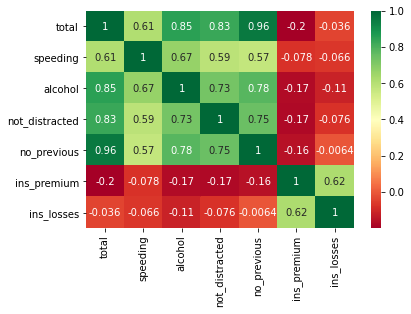

In [29]:
sns.heatmap(df.corr(), annot= True, cmap = "RdYlGn");

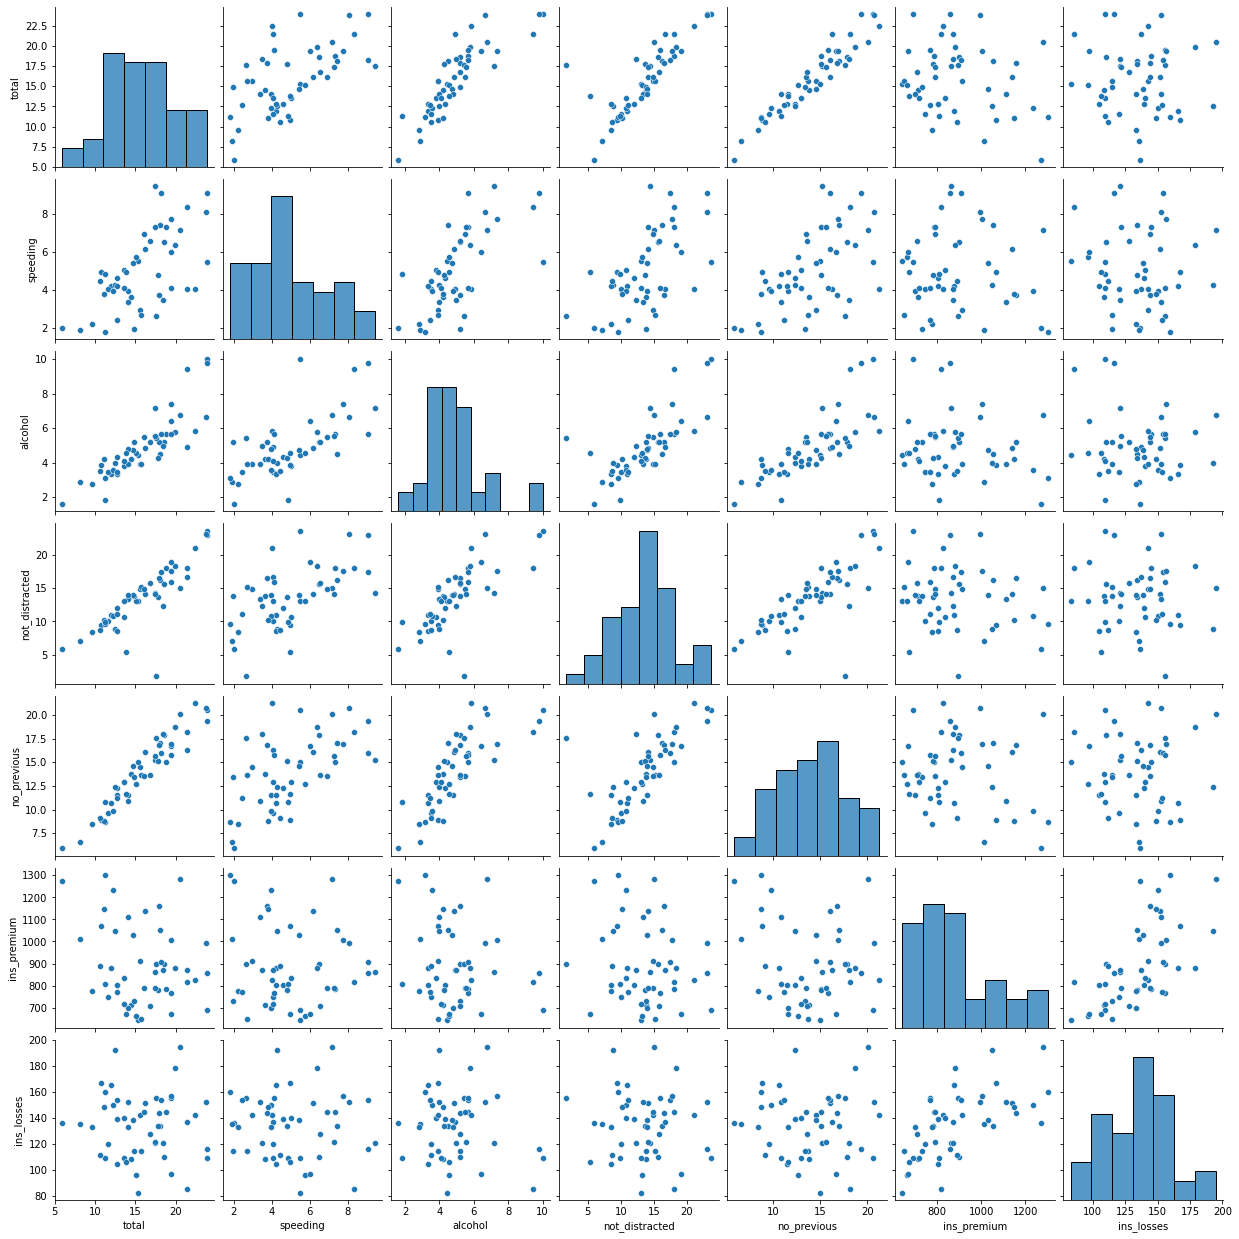

In [30]:
sns.pairplot(df);  # her iki değişken arasındaki scatterplotları (her karşılıklı değer için)gösterir.